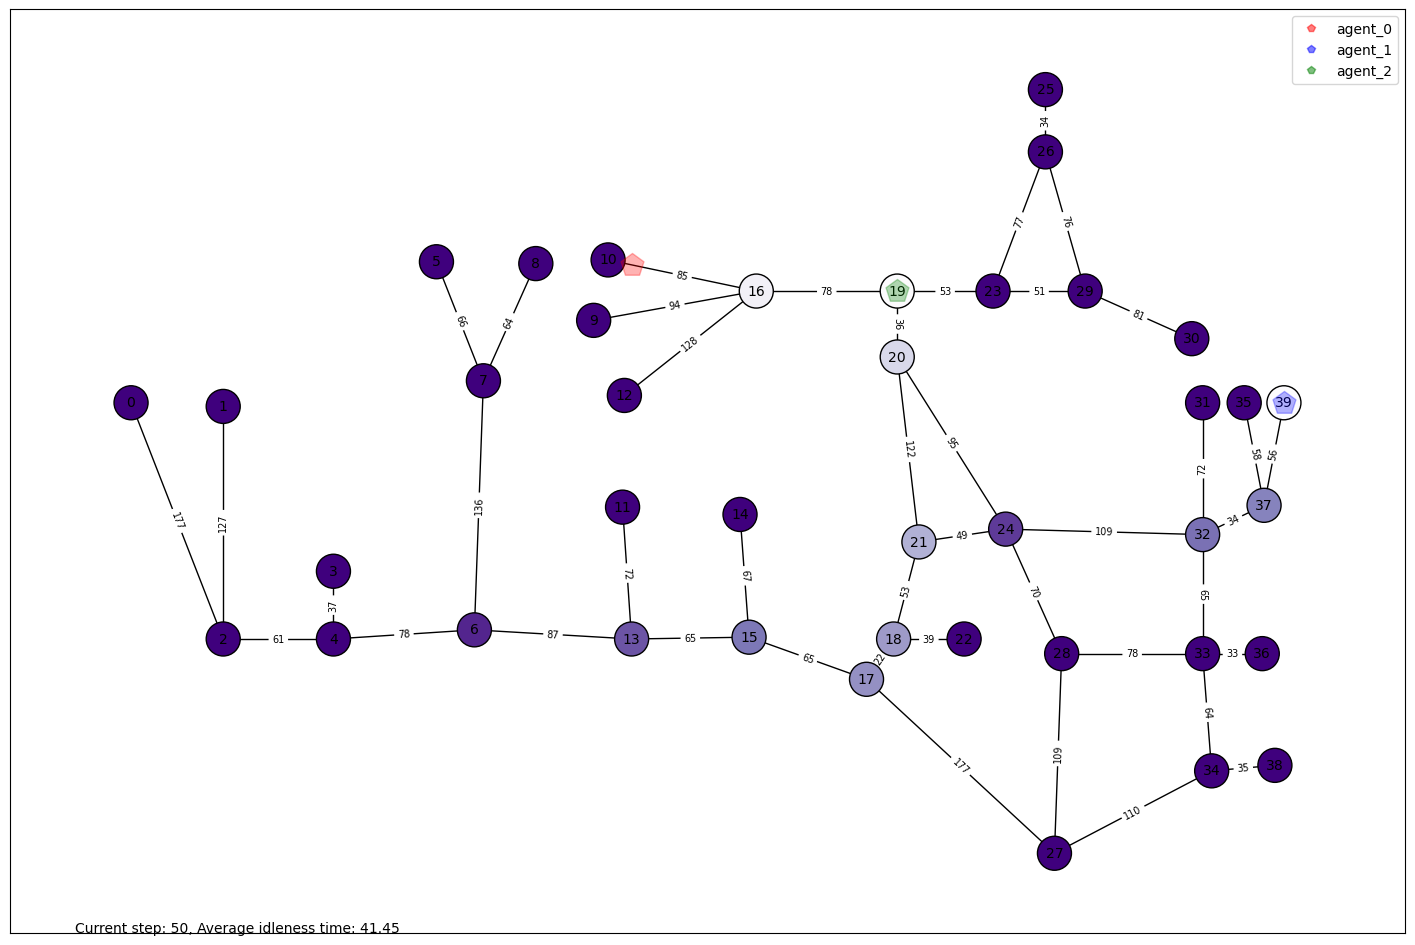

In [38]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communicaiton_model import Comm_model

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 3,
                   observation_radius= 0, 
                   model_name = "Gil_el_model",
                   model = Comm_model(),
                               require_explicit_visit=False)

observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()

    i += 1
    if i >= 50:
        break
env.close()

In [39]:
env.observe(env.agents[0])

{'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7f44eda23dc0>: (23.11589678280923,
   27.319570179173695)},
 'vertex_state': {},
 'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7f44eda23dc0>: array([929, 879, 752, 728, 691, 815, 613, 749, 813, 179,   0, 598, 213,
         526, 528, 461,  85, 396, 374, 163, 199, 321, 413, 216, 294, 327,
         293, 473, 364, 267, 348, 475, 403, 442, 506, 495, 475, 437, 541,
         493])}}

In [40]:
observations[env.possible_agents[0]]

{'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7f44eda23dc0>: (23.11589678280923,
   27.319570179173695),
  <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7f44eda22ec0>: (50.175,
   21.675),
  <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7f44eda223e0>: (34.125,
   26.25)},
 'vertex_state': {},
 'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7f44eda23dc0>: array([929, 879, 752, 728, 691, 815, 613, 749, 813, 179,   0, 598, 213,
         526, 528, 461,  85, 396, 374, 163, 199, 321, 413, 216, 294, 327,
         293, 473, 364, 267, 348, 475, 403, 442, 506, 495, 475, 437, 541,
         493])}}

In [4]:
env.action_spaces

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7fc239c68fd0>: Discrete(40),
 <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7fc239c68f70>: Discrete(40),
 <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x7fc239c69030>: Discrete(40)}

In [14]:
env.observation_space(env.possible_agents[0])["agent_state"]

Dict(<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fc239c68fd0>: Box([2.325 3.225], [50.175 34.5  ], (2,), float32), <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fc239c68f70>: Box([2.325 3.225], [50.175 34.5  ], (2,), float32), <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fc239c69030>: Box([2.325 3.225], [50.175 34.5  ], (2,), float32))

In [15]:
import gymnasium
from gymnasium import spaces
from gymnasium.spaces import utils

subspace1 = spaces.Discrete(2)
subspace2 = spaces.Box(low=0, high=1,shape=(2,))
observations_space = spaces.Tuple((subspace1, subspace2))

observation = (0, [0.1, 0.2])

flattened_observation = utils.flatten(observation, observations_space)
print(flattened_observation)

NotImplementedError: Unknown space: `(0, [0.1, 0.2])`